### Edgar Moises Hernandez-Gonzalez
#### 27/11/19-12/12/19
#### Clasificacion de alfa de los canales C3 y C4 de MI-EEG con CNN
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 510)
(288, 510)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 2, 255, 1))
x_test = x_test.reshape((n_samples_test, 2, 255, 1))

print(x_train.shape)
print(x_test.shape)

(288, 2, 255, 1)
(288, 2, 255, 1)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
288/288 [==============================] - 0s 367us/sample - loss: 3.6909 - acc: 0.3333
kappa:  0.11111111111111116
confusion matrix:
 [[22 32 12  6]
 [32 28  8  4]
 [12 10 24 26]
 [11 15 24 22]]
(0.3368443929295857, 0.3333333333333333, 0.333327148207668, None)


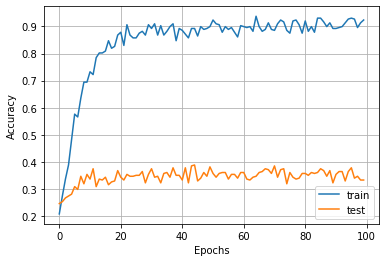

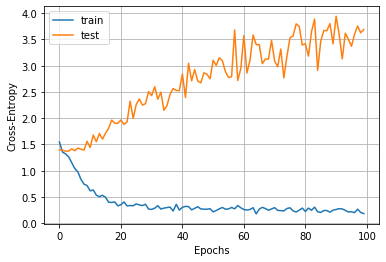

Iteration: 2
288/288 [==============================] - 0s 95us/sample - loss: 2.9719 - acc: 0.3715
kappa:  0.1620370370370371
confusion matrix:
 [[17 26 11 18]
 [18 31  8 15]
 [ 9  6 18 39]
 [ 5  7 19 41]]
(0.3685140870507495, 0.3715277777777778, 0.3605261742725731, None)


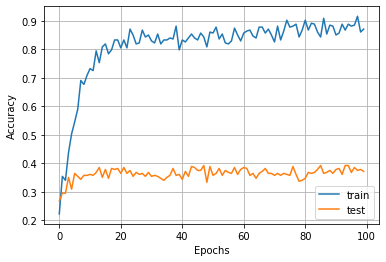

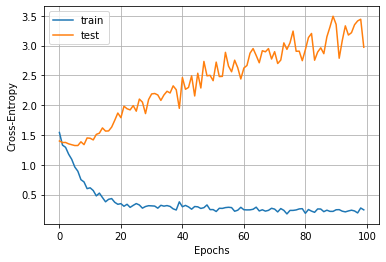

Iteration: 3
288/288 [==============================] - 0s 104us/sample - loss: 3.6221 - acc: 0.3194
kappa:  0.09259259259259256
confusion matrix:
 [[22 29 11 10]
 [38 20  8  6]
 [16  5 17 34]
 [16  7 16 33]]
(0.3228781814026213, 0.3194444444444444, 0.31726114065651934, None)


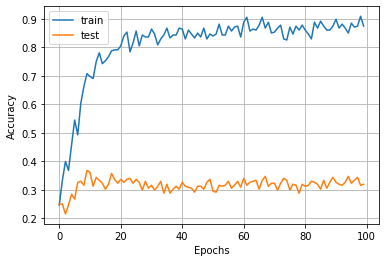

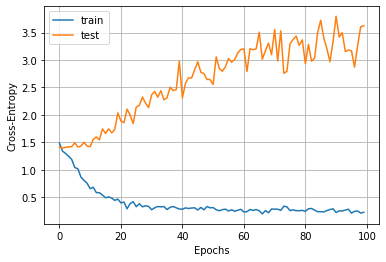

Iteration: 4
288/288 [==============================] - 0s 102us/sample - loss: 3.6610 - acc: 0.3333
kappa:  0.11111111111111116
confusion matrix:
 [[17 26 17 12]
 [28 27  7 10]
 [12  9 27 24]
 [ 5 14 28 25]]
(0.3308353835592264, 0.33333333333333337, 0.3314656129596329, None)


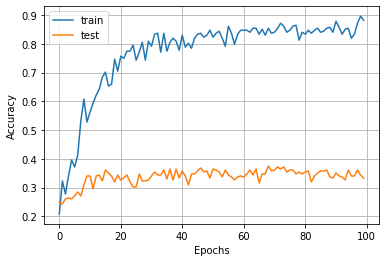

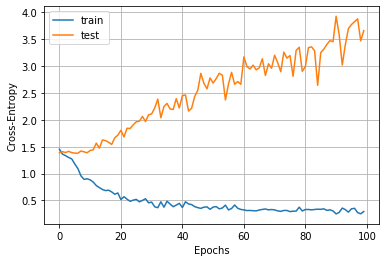

Iteration: 5
288/288 [==============================] - 0s 84us/sample - loss: 3.4675 - acc: 0.3403
kappa:  0.12037037037037035
confusion matrix:
 [[17 23 11 21]
 [22 22  9 19]
 [11  5 24 32]
 [ 5  7 25 35]]
(0.3424961780166126, 0.3402777777777778, 0.3350721977949401, None)


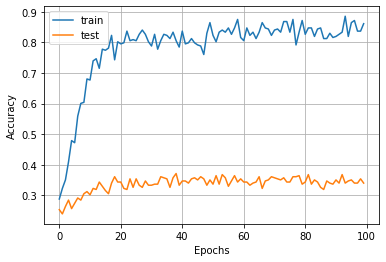

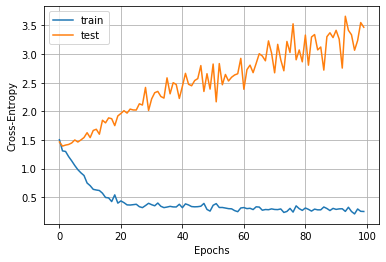

Iteration: 6
288/288 [==============================] - 0s 89us/sample - loss: 3.4706 - acc: 0.3646
kappa:  0.1527777777777778
confusion matrix:
 [[24 26 12 10]
 [27 25  8 12]
 [14  6 23 29]
 [10  7 22 33]]
(0.3643320741758242, 0.3645833333333333, 0.3632552543757537, None)


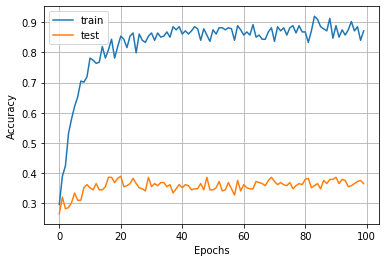

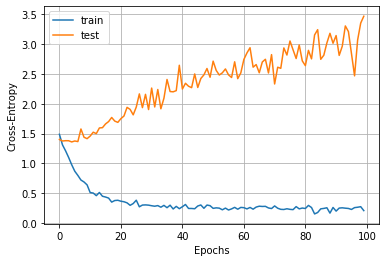

Iteration: 7
288/288 [==============================] - 0s 95us/sample - loss: 3.3988 - acc: 0.3785
kappa:  0.17129629629629628
confusion matrix:
 [[17 36  9 10]
 [19 36  7 10]
 [ 8 11 28 25]
 [ 9 10 25 28]]
(0.3743025591148931, 0.3784722222222222, 0.3729334133706841, None)


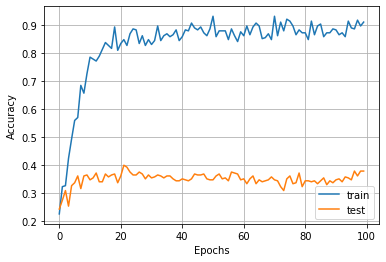

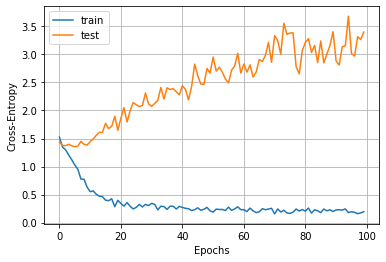

Iteration: 8
288/288 [==============================] - 0s 89us/sample - loss: 2.9780 - acc: 0.3889
kappa:  0.18518518518518523
confusion matrix:
 [[29 23 11  9]
 [33 26  7  6]
 [15  7 26 24]
 [13 10 18 31]]
(0.39459339943210914, 0.3888888888888889, 0.38987892634082993, None)


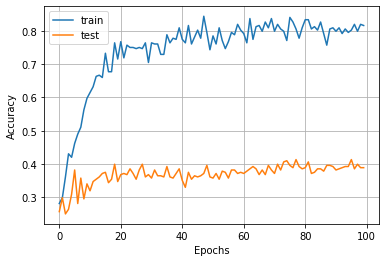

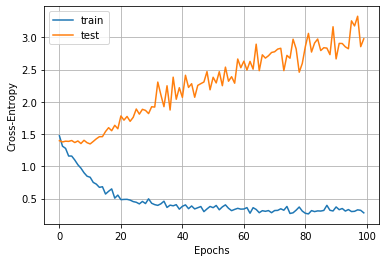

Iteration: 9
288/288 [==============================] - 0s 90us/sample - loss: 3.9937 - acc: 0.3576
kappa:  0.1435185185185185
confusion matrix:
 [[25 30  9  8]
 [32 28  8  4]
 [16  7 22 27]
 [13 13 18 28]]
(0.3633868483587148, 0.3576388888888889, 0.35843799967385526, None)


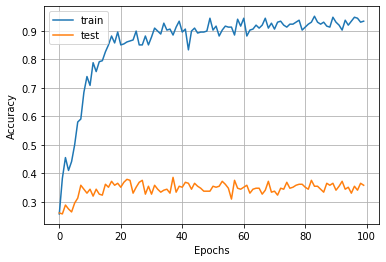

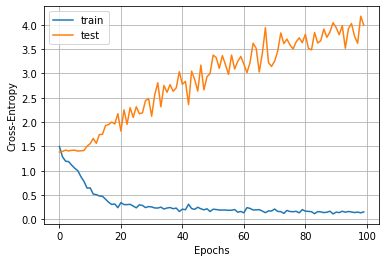

Iteration: 10
288/288 [==============================] - 0s 93us/sample - loss: 3.2947 - acc: 0.3681
kappa:  0.15740740740740744
confusion matrix:
 [[34 19  9 10]
 [40 18  6  8]
 [21  4 22 25]
 [16  4 20 32]]
(0.3797344713134187, 0.3680555555555555, 0.36393410703088824, None)


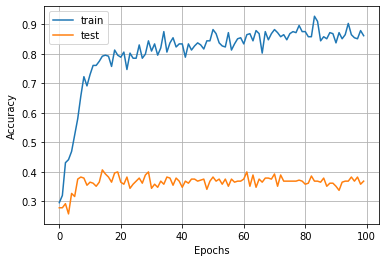

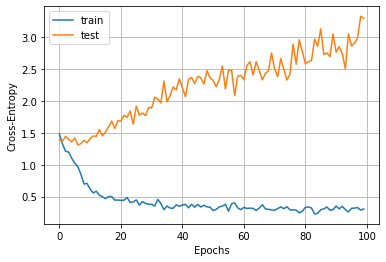


Resultados:
loss: [3.6909092797173395, 2.971932808558146, 3.622136698828803, 3.6610407564375134, 3.4674822754330106, 3.4705985652075872, 3.398763232760959, 2.977992163764106, 3.9936501185099282, 3.294689098993937]
accuracy: [0.33333334, 0.3715278, 0.31944445, 0.33333334, 0.3402778, 0.36458334, 0.3784722, 0.3888889, 0.3576389, 0.36805555]
kappa: [0.11111111111111116, 0.1620370370370371, 0.09259259259259256, 0.11111111111111116, 0.12037037037037035, 0.1527777777777778, 0.17129629629629628, 0.18518518518518523, 0.1435185185185185, 0.15740740740740744]
precision: [0.3368443929295857, 0.3685140870507495, 0.3228781814026213, 0.3308353835592264, 0.3424961780166126, 0.3643320741758242, 0.3743025591148931, 0.39459339943210914, 0.3633868483587148, 0.3797344713134187]
recall: [0.3333333333333333, 0.3715277777777778, 0.3194444444444444, 0.33333333333333337, 0.3402777777777778, 0.3645833333333333, 0.3784722222222222, 0.3888888888888889, 0.3576388888888889, 0.3680555555555555]
f1: [0.33332714820766

In [0]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(Conv2D(64, (2,7), activation='relu', input_shape=(2,255,1)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 1, 249, 64)        960       
_________________________________________________________________
flatten_9 (Flatten)          (None, 15936)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                509984    
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 132       
Total params: 511,076
Trainable params: 511,076
Non-trainable params: 0
_________________________________________________________________


In [0]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.3556
std: (+/- 0.0216)
kappa: 0.1407
precision: 0.3578
recall: 0.3556
f1: 0.3526
